# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
Data = Data[Data.Sex != "unknown"]
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [8]:
Data["Sex"] = Data["Sex"].apply(lambda x: 1 if x == "male" else 0)

Посмотрим, как влияет пол на выживаемость.

In [9]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


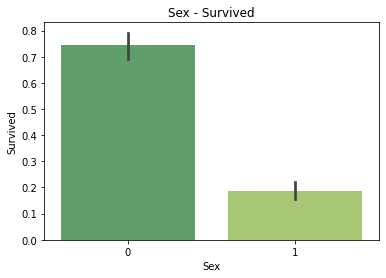

In [10]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

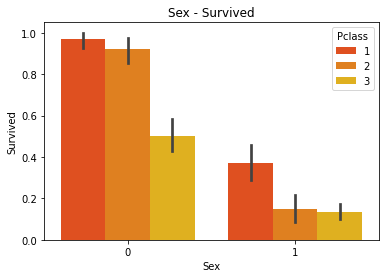

In [11]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

C:\Users\Oleg\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


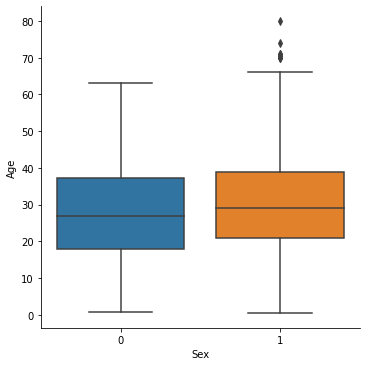

In [12]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

C:\Users\Oleg\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


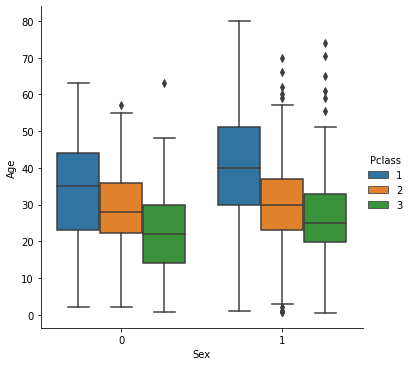

In [13]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [14]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [15]:
Data.dropna(subset=["Embarked"], inplace=True)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [16]:
Data.drop("Embarked", axis=1, inplace=True)

In [17]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [18]:
Data.Age.isnull().sum()

175

Заполним пропуски медианным значением Age.

In [19]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

C:\Users\Oleg\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


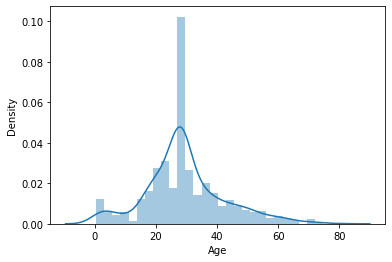

In [20]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

C:\Users\Oleg\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


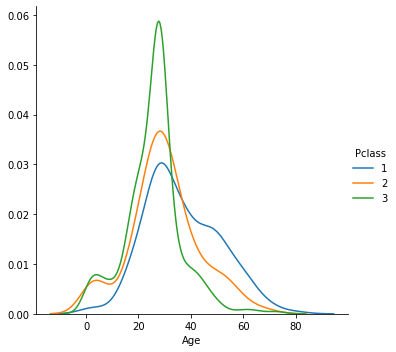

In [21]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [22]:
Data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
6.8583      1
8.0292      1
12.6500     1
12.0000     1
10.5167     1
Name: Fare, Length: 246, dtype: int64

**Обработаем признак 'Pclass'**

In [23]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

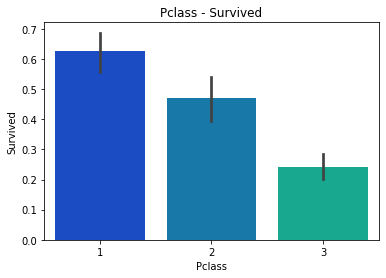

In [24]:
sns.barplot(x="Pclass", y="Survived", data=Data, palette="winter")
plt.title("Pclass - Survived")
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [25]:
Data.drop('PassengerId',axis=1,inplace=True)

In [26]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [27]:
NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

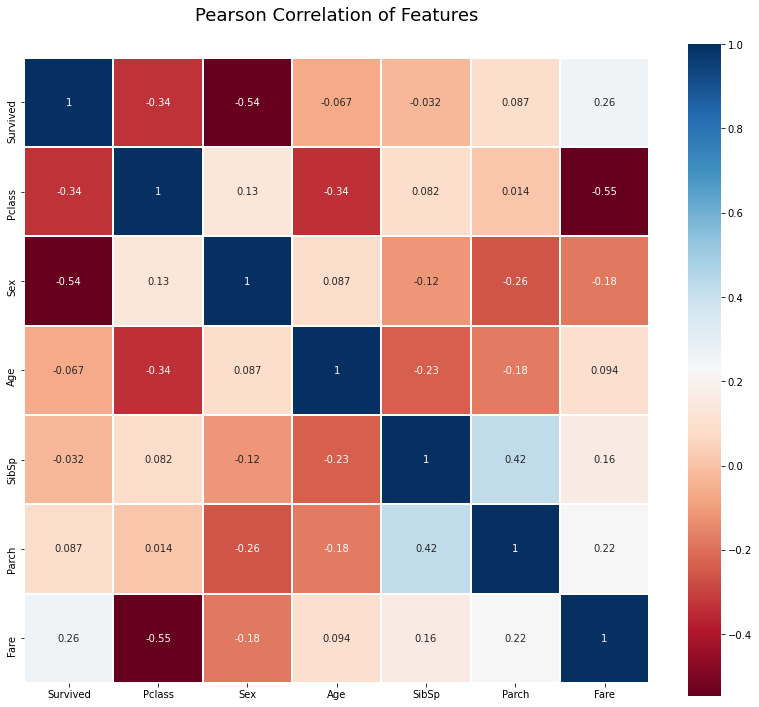

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

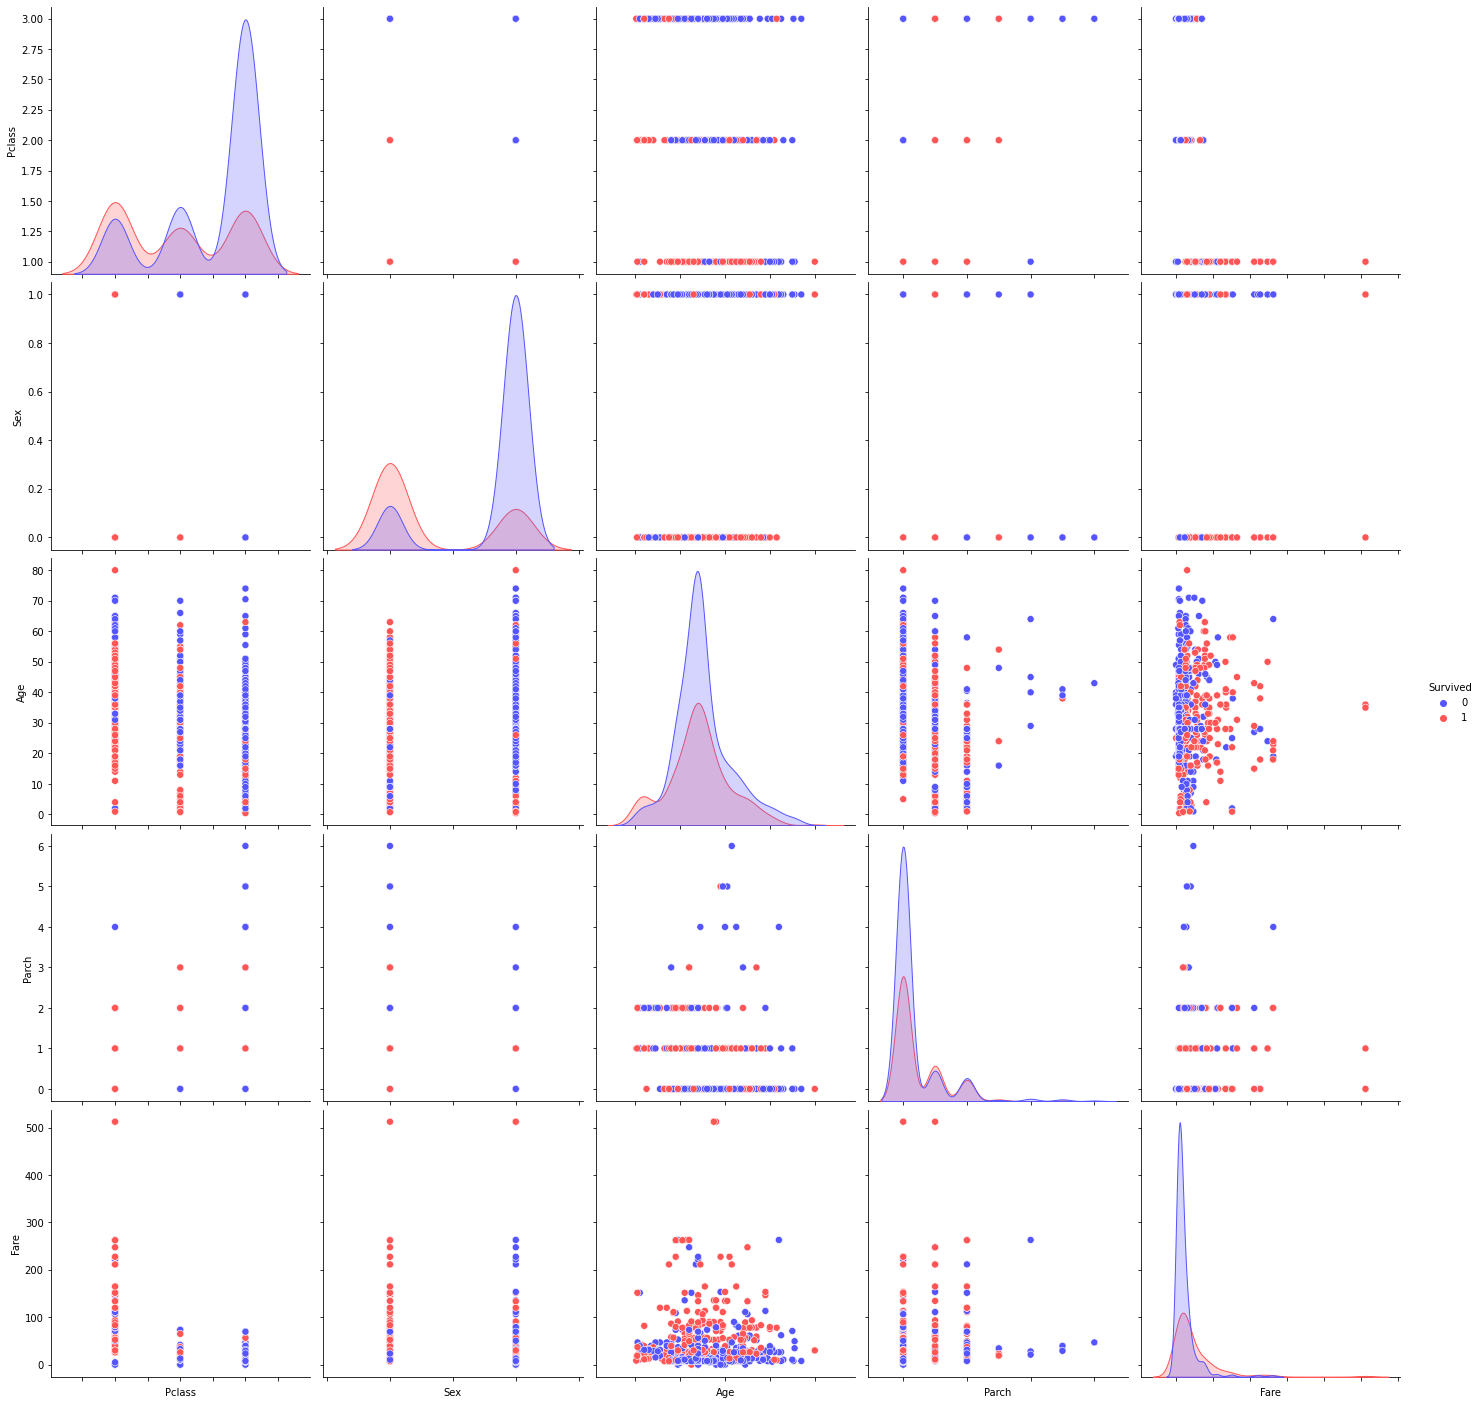

In [29]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины, да ещё небогатые - нет
* больше погибших, чем выживших

In [30]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    if x.Sex == 1 and x.Pclass > 1:
        return 0
    return 0

In [31]:
Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)
Data[['Survived','prediction']]

,Survived,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Посмотрим на качество нашего предсказания.

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['prediction'])

0.7873303167420814

## Бонусная часть - домашнее задание (+1 балл к итоговой оценке).

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [33]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)
Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])
Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [35]:
Data['FareBin'] = pd.qcut(Data['Fare'].astype(float), 4)
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])
Data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.001, 7.896]",0
1,71.2833,"(31.0, 512.329]",3
2,7.9250,"(7.896, 14.454]",1
3,53.1000,"(31.0, 512.329]",3
4,8.0500,"(7.896, 14.454]",1


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [36]:
Data["NameLen"] = Data.Name.apply(lambda x: len(x))
# +1 - включая самого человека
def foo(Parch, SibSp):
    return Parch + SibSp + 1

Data["FamilySize"] = Data.apply(lambda x: foo(x.Parch, x.SibSp), axis=1)
Data["IsAlone"] = Data.FamilySize.apply(lambda x: True if x == 1 else False)

**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

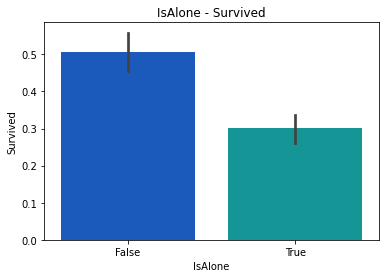

In [37]:
sns.barplot(x="IsAlone", y="Survived", data=Data, palette="winter")
plt.title("IsAlone - Survived")
plt.show()

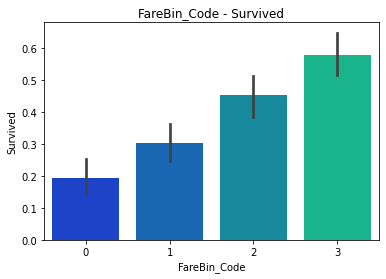

In [38]:
sns.barplot(x="FareBin_Code", y="Survived", data=Data, palette="winter")
plt.title("FareBin_Code - Survived")
plt.show()

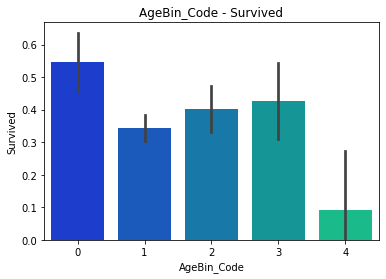

In [39]:
sns.barplot(x="AgeBin_Code", y="Survived", data=Data, palette="winter")
plt.title("AgeBin_Code - Survived")
plt.show()

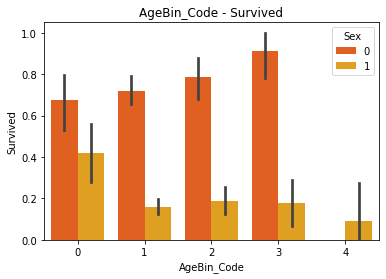

In [40]:
sns.barplot(x='AgeBin_Code', y='Survived', hue='Sex', data=Data, palette='autumn')
plt.title('AgeBin_Code - Survived')
plt.show()

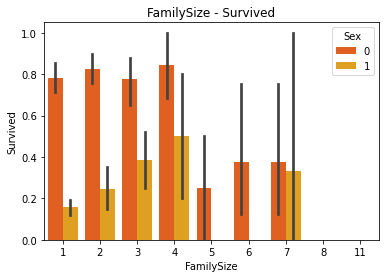

In [48]:
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=Data, palette='autumn')
plt.title('FamilySize - Survived')
plt.show()

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

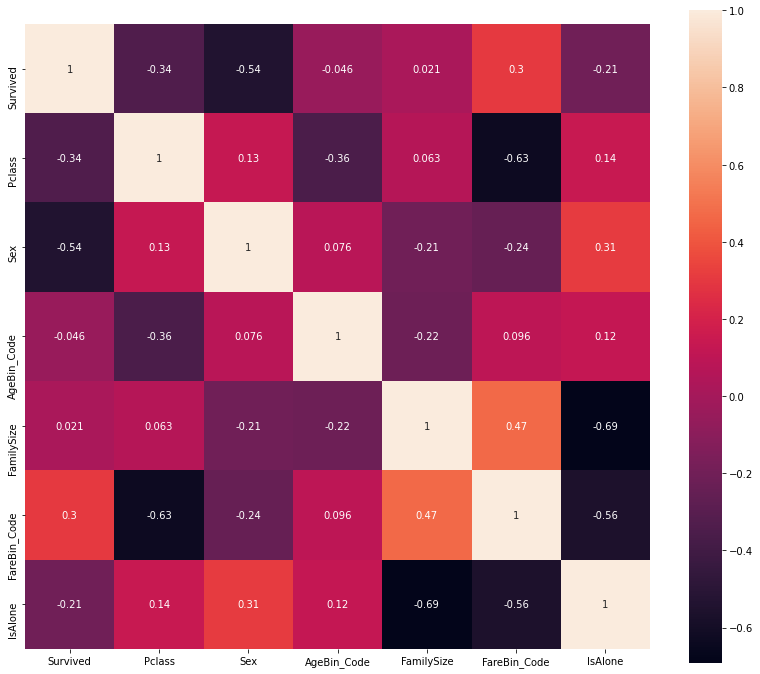

In [42]:
NumericData = Data[["Survived", "Pclass", "Sex", "AgeBin_Code", "FamilySize", "FareBin_Code", "IsAlone"]]._get_numeric_data()

plt.figure(figsize=(14,12))
sns.heatmap(NumericData.corr(), annot=True, square=True)
plt.show()

Заметим, что сильное влияние оказывает цена билета (в свою очередь зависит от класса) и то, путешествовал ли челок в одиночку или нет (что, кстати, зависит на мое удивление от цены билета).

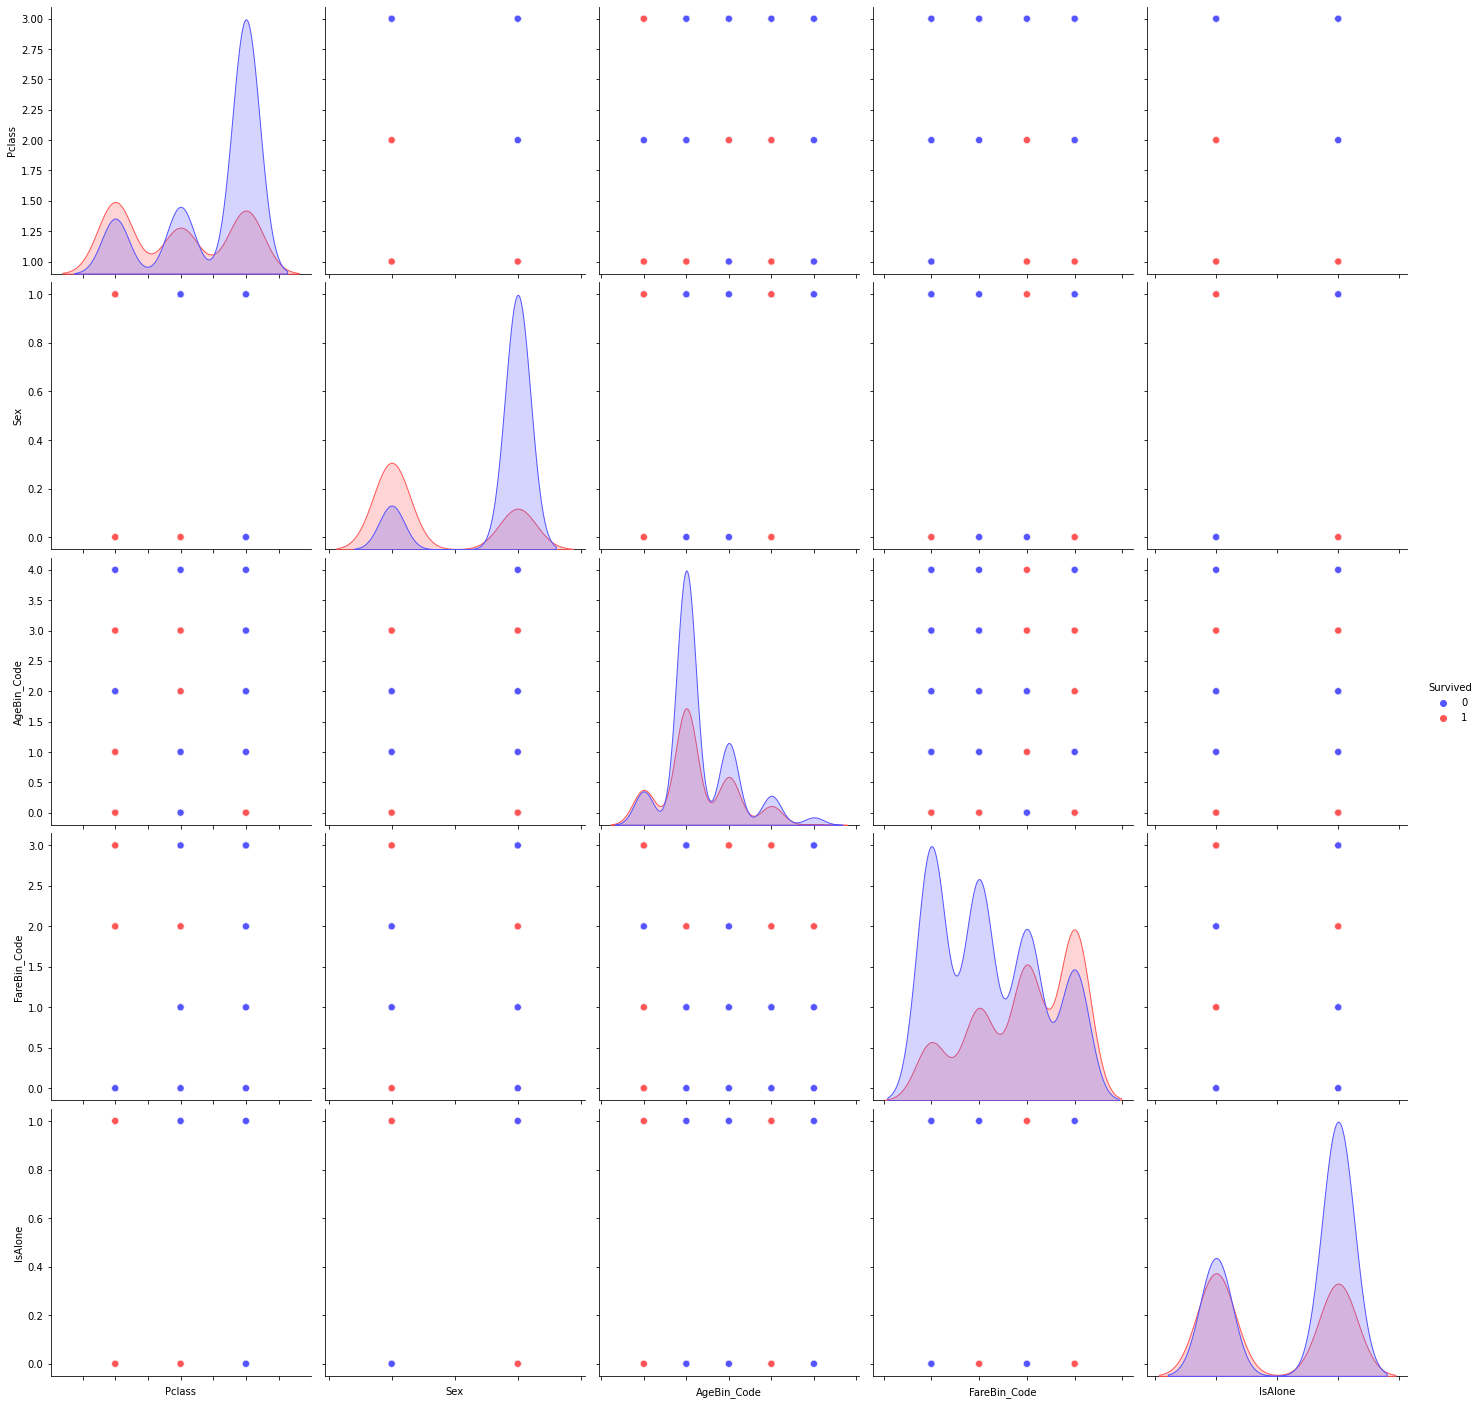

In [43]:
g = sns.pairplot(Data[[u"Survived", u"Pclass", u"Sex", u"AgeBin_Code", u"FareBin_Code", u"IsAlone"]], \
                 hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

In [44]:
#your code here

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

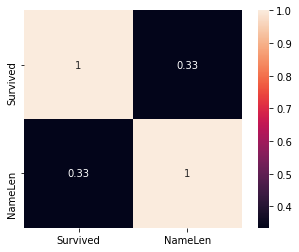

In [45]:
NumericData = Data[["Survived", "NameLen"]]._get_numeric_data()

sns.heatmap(NumericData.corr(), annot=True, square=True)
plt.show()

Привел для примера.\
Казалось бы - как может влиять длина имени на выживаемость? Да никак, но несмотря на это, мы получили довольно-таки сильную зависимость. Это говорит о том, что не все признаки с высоким коэффициентом могут влиять на выживаемость.\
С другой стороны, маленький коэффициент у `FamilySize`, однако в 10 раз больше - у `IsAlone`, но из `IsAlone` сильно зависит от `FamilySize`. Иными словами, если признак плохо влияет на выживаемость по таблице корреляций, то это не значит, что он не влияет фактически. Часто можно вывести новый признак, и ситуация несколько преобразится.

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass другие признаки.

In [111]:
def first_prediction(x):
    if x.Sex == 0:

        if x.IsAlone == False and x.Pclass > 2:
            return 0

        return 1
    
    else:        
        if x.AgeBin_Code == 0:
            if x.Pclass > 1:
                return 0
            else:
                return 1  
            
        elif x.AgeBin_Code == 2:
            if x.FareBin_Code == 2 and x.Pclass == 1:
                return 1
    
    return 0

Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)

In [112]:
accuracy_score(Data['Survived'], Data['prediction'])

0.8099547511312217